In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [17]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col="Id")

In [18]:
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True)
column_to_remove = list(all_data.select_dtypes(include=['category','object']))
all_data = all_data.drop(column_to_remove, axis=1)

In [19]:
all_data = all_data.replace({np.NaN:0})

# Forest regression starts here

In [20]:
training_data = all_data.iloc[:1460, :]
testing_data = all_data.iloc[-1459:, :]
training_data.shape, testing_data.shape

((1460, 37), (1459, 37))

In [21]:
X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1:]
X_train, X_test = training_data.iloc[:,:-1], testing_data.iloc[:,:-1]
#X_test
y_train, y_test = training_data.iloc[:,-1:], testing_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [22]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_20376\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

# Random Forest Model Prediction for 50% of missing housing data

In [23]:
print("model score on training data:", forest.score(X_train, y_train))
#print("model score on test data:", forest.score(X_test, y_test)) # we do not need this as we do not yet have any prices to compare the random forest model for the missing data
y_predicted = forest.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9782319167420074


array([127182.5 , 155371.5 , 189935.4 , ..., 162357.18, 110480.21,
       234921.58])

# Reverse Forest 50:50 split to verify that the prediction is correct

In [32]:
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")

column_to_remove = list(testing_data.select_dtypes(include=['category','object']))
testing_data = testing_data.drop(column_to_remove, axis=1)
testing_data.loc[testing_data['LotFrontage'].isna() , 'LotFrontage'] = 0
testing_data.loc[testing_data['GarageYrBlt'].isna() , 'GarageYrBlt'] = 0
testing_data.loc[testing_data['MasVnrArea'].isna() , 'MasVnrArea'] = 0

testing_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [33]:
y_predicted = pd.DataFrame(y_predicted, columns = ['SalePrice'])

testing_data = testing_data.reset_index()
testing_data["SalePrice"] = y_predicted
testing_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,127182.50
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,155371.50
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,189935.40
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,183574.00
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,197631.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,85488.00
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,162357.18
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,110480.21
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,234921.58


In [34]:
testing_data.drop(["Id"], axis=1, inplace=True)
columns_has_null = testing_data.isna().sum().sort_values(ascending=False)
#columns_has_null[columns_has_null > 0]

testing_data = testing_data.replace({np.NaN:0})

In [35]:
testing_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,127182.50
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,155371.50
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,189935.40
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,183574.00
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,197631.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,85488.00
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,162357.18
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,110480.21
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,234921.58


# Matrix

In [40]:
matrix = testing_data.corr().abs()
columns_to_keep = matrix.iloc[-1, :]>=0
rows_to_keep = matrix.iloc[:, -1]>=0
new_matrix = matrix.loc[rows_to_keep, columns_to_keep]
new_matrix.shape

(37, 37)

<AxesSubplot:>

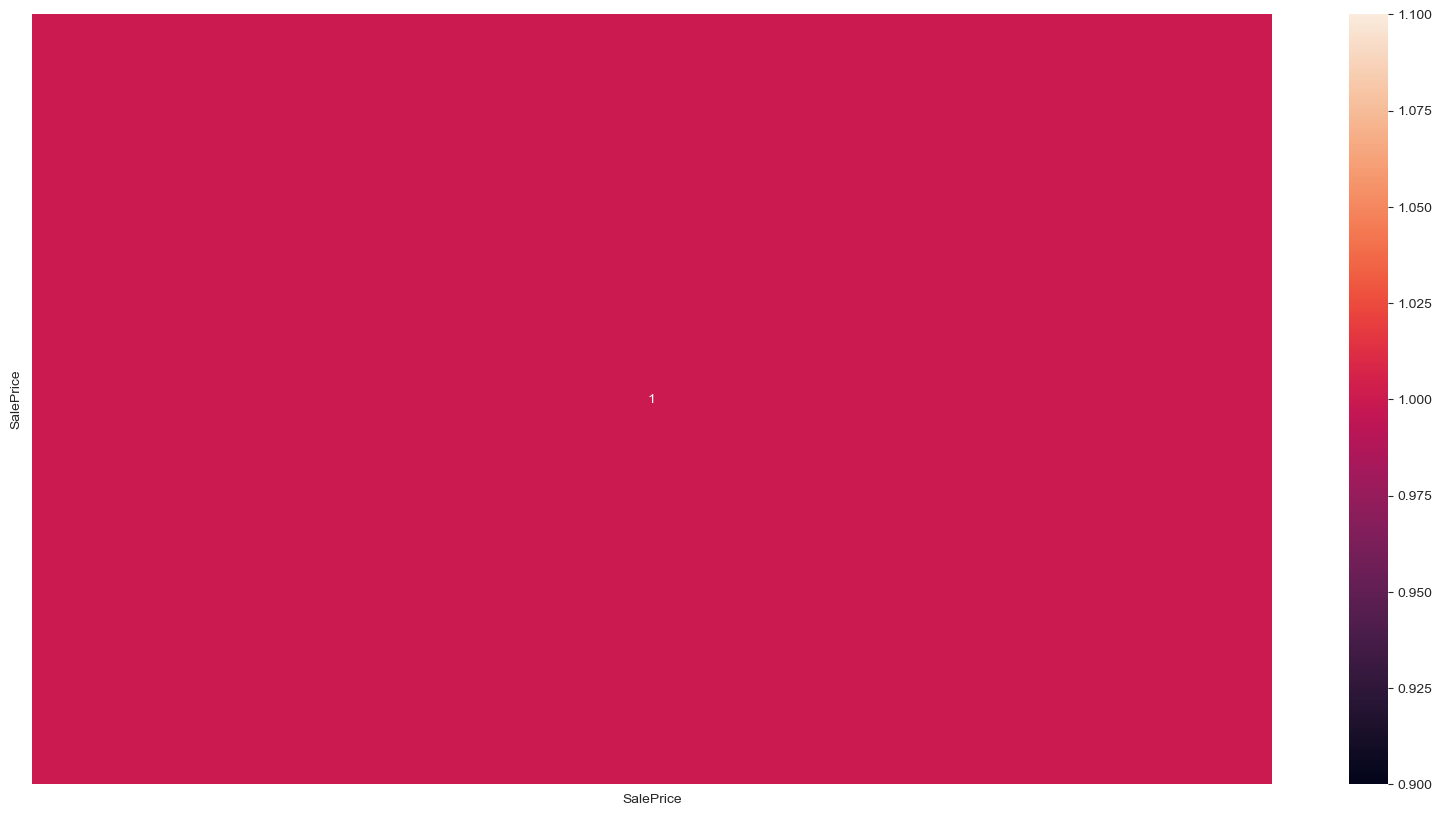

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(new_matrix,  annot=True)

In [52]:
matrix = testing_data.corr().abs()
columns_to_keep = matrix.iloc[-1, :]>=0.65
rows_to_keep = matrix.iloc[:, -1]>=0.65
new_matrix = matrix.loc[rows_to_keep, columns_to_keep]
new_matrix.shape

(10, 10)

<AxesSubplot:>

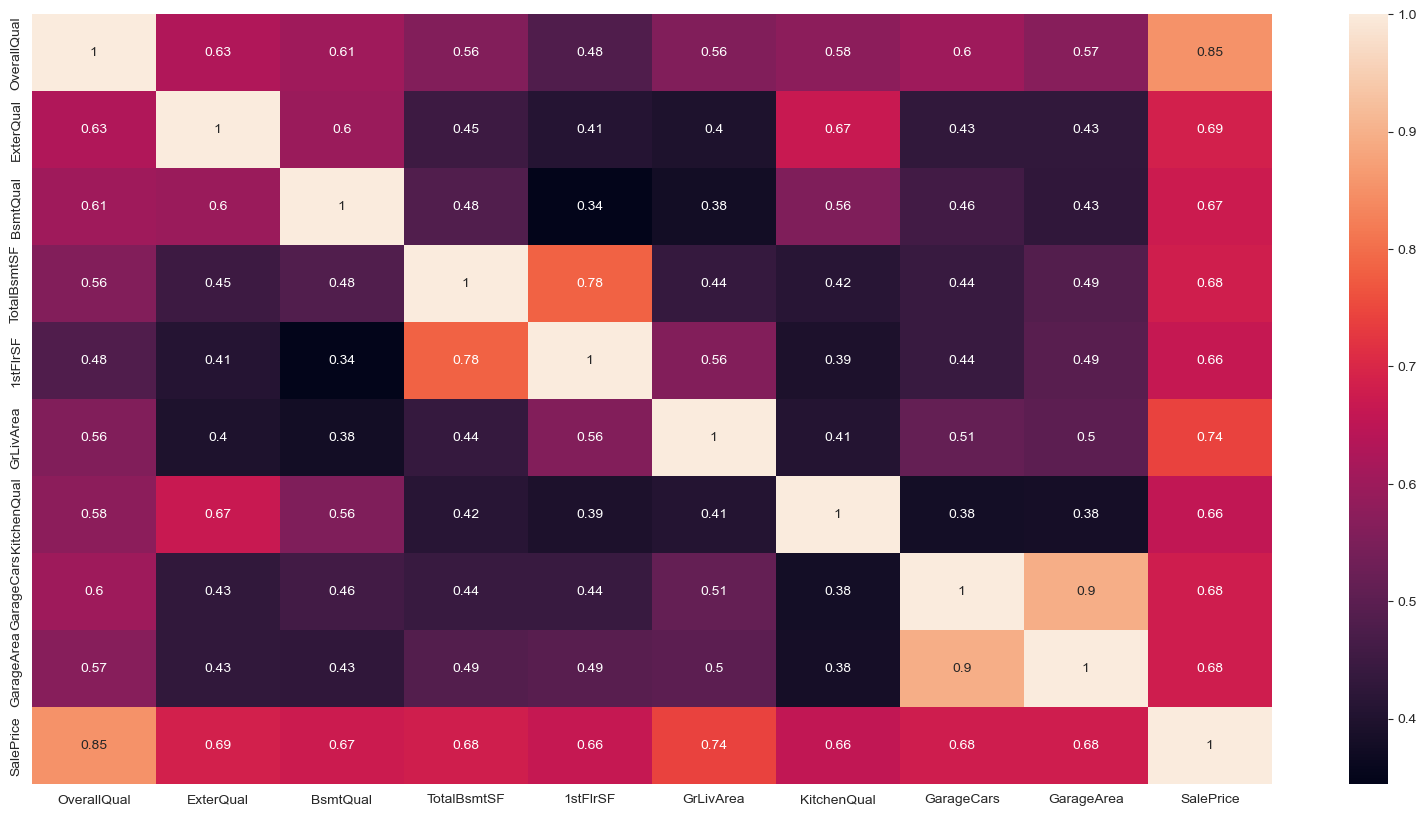

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(new_matrix,  annot=True)

# Taking the best correlation to the SalePrice

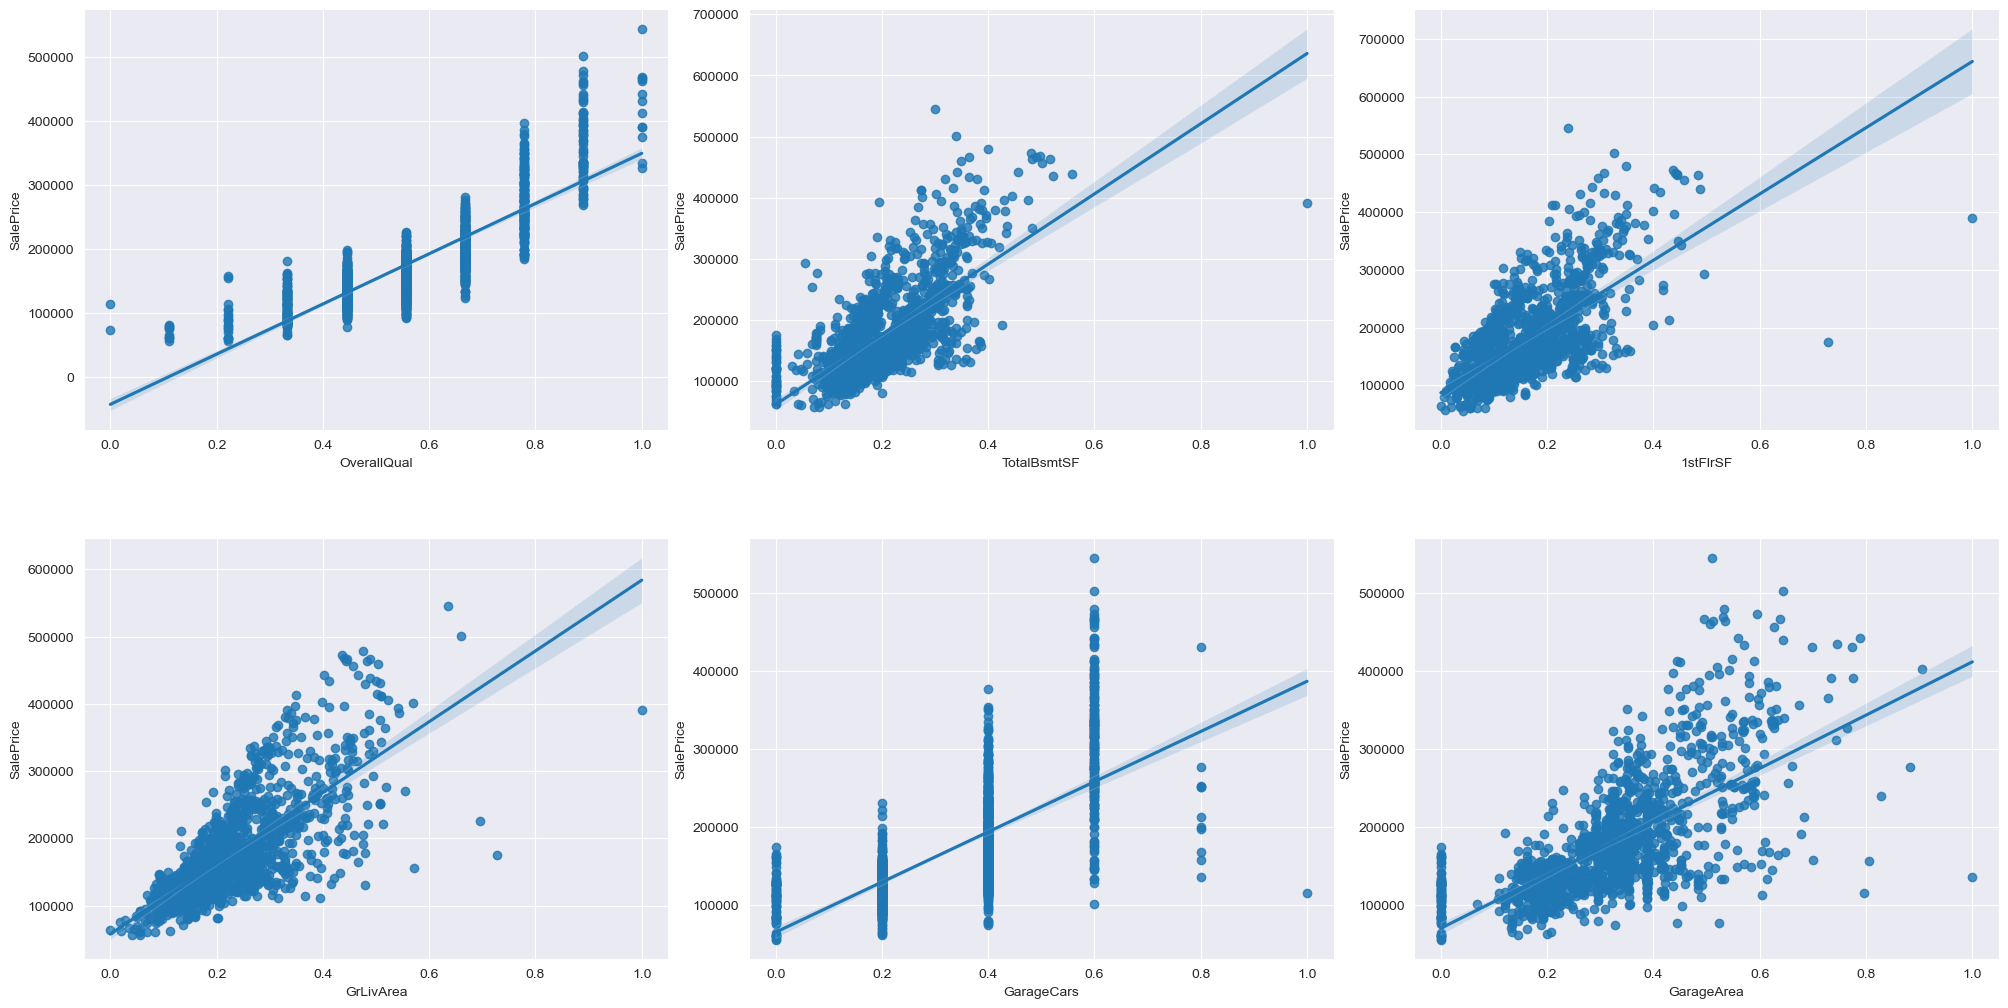

In [59]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
x = testing_data.loc[:,column_sels]
y = testing_data['SalePrice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)